In [ ]:
#코랩 한글깨짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,998 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
#필요한 모듈 불러오기
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**코로나가 사이버범죄에 미치는 영향**을 파악하고 싶어서 네이버 뉴스 기사에서 '사이버 범죄'관련 키워드를 뽑아 크롤링을 했다.
  - 기간: 19년 하반기(7월-12월)와 20년 하반기(7월-12월)를 비교
  - 키워드 선정 기준: 정보통신망 이용 범죄(https://ecrm.cyber.go.kr/minwon/crs/quick/cyber1) 에 한정하여 결정 (+지면 기사만을 추출)
    
 *키워드 6개*
    1. 사이버 사기
    2. 사이버 금융범죄, 피싱피해
    3. 개인정보침해 
    4. 스팸 메일, 스팸 문자

#19년 하반기 키워드 6개 데이터가공

In [ ]:
# 키워드: 사이버 사기
start = 1
result_19 = pd.DataFrame()

for i in range (5):
  url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%22%EC%82%AC%EC%9D%B4%EB%B2%84%20%EC%82%AC%EA%B8%B0%22&sort=0&photo=0&field=0&pd=3&ds=2019.07.01&de=2019.12.31&cluster_rank=13&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20190701to20191231,a:all&start='+ format(start)
  headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
             'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
  response = requests.get(url, headers=headers)
  soup = BeautifulSoup(response.text, 'lxml')
  news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] # 기사 제목
  news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] # 기사 url
        
  dates = [ date.get_text() for date in soup.find_all('span', attrs={'class':'info'})] # 기사 작성일
  news_date = []
  for date in dates:
    if re.search(r'\d+.\d+.\d+.', date) != None: # 기사 작성일 정제
      news_date.append(date)
        
  df = pd.DataFrame({'기사작성일':news_date,'기사제목':news_title,'기사주소':news_url})
  result_19 = pd.concat([result_19, df], ignore_index=True)
  start += 10

result_19

,기사작성일,기사제목,기사주소
0,2019.12.04.,"한국사이버보안협회 소속 '디포렌식코리아', 피씽 구제 위해 디지털성범죄 및 피싱 대처",http://www.dtnews24.com/news/articleView.html?...
1,2019.11.01.,"[이웃집 경찰관]""스미싱·메신저피싱·로맨스 스캠...사이버 사기수법 알려져야 피해 줄여""",https://www.sedaily.com/NewsView/1VQMODAMPP
2,2019.11.27.,[사이버 공격 동향①] 옛 것은 가고 새 것이 온다,http://www.datanet.co.kr/news/articleView.html...
3,2019.09.19.,"[기고] 3不(불안, 불신, 불행) 사이버 사기 OUT",http://www.nbnnews.co.kr/news/articleView.html...
4,2019.11.18.,"증가하는 인터넷 사기, 개인 직거래와 최저가 유혹 조심해야",https://news.imaeil.com/Society/20191118143658...
5,2019.11.12.,"컴퓨터 사기 범죄자들, 자동화 봇이 아니라 값싼 노동력 선호",http://www.boannews.com/media/view.asp?idx=844...
6,2019.10.07.,사설-사이버 범죄 근절대책 마련을,http://www.gndomin.com/news/articleView.html?i...
7,2019.09.10.,[독자투고] 사이버 범죄 예방법 숙지로 풍성한 한가위 보내세요,http://www.kyongbuk.co.kr/news/articleView.htm...
8,2019.09.01.,"추석 연휴, 사이버 범죄 예방은?",http://www.idaegu.com/newsView/idg201909010079
9,2019.08.28.,사이버 범죄 예방법 숙지로 풍성한 한가위 보내세요,http://www.ksmnews.co.kr/default/index_view_pa...


In [ ]:
# 키워드: 사이버 금융범죄
start = 1

for i in range (35):
  url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%22%EC%82%AC%EC%9D%B4%EB%B2%84%20%EA%B8%88%EC%9C%B5%EB%B2%94%EC%A3%84%22&sort=0&photo=0&field=0&pd=3&ds=2019.07.01&de=2019.12.31&cluster_rank=155&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20190701to20191231,a:all&start='+ format(start)
  headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
             'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
  response = requests.get(url, headers=headers)
  soup = BeautifulSoup(response.text, 'lxml')
  news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] # 기사 제목
  news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] # 기사 url
        
  dates = [ date.get_text() for date in soup.find_all('span', attrs={'class':'info'})] # 기사 작성일
  news_date = []
  for date in dates:
    if re.search(r'\d+.\d+.\d+.', date) != None: # 기사 작성일 정제
      news_date.append(date)
        
  df = pd.DataFrame({'기사작성일':news_date,'기사제목':news_title,'기사주소':news_url})
  result_19 = pd.concat([result_19, df], ignore_index=True)
  start += 10

result_19

,기사작성일,기사제목,기사주소
0,2019.12.04.,"한국사이버보안협회 소속 '디포렌식코리아', 피씽 구제 위해 디지털성범죄 및 피싱 대처",http://www.dtnews24.com/news/articleView.html?...
1,2019.11.01.,"[이웃집 경찰관]""스미싱·메신저피싱·로맨스 스캠...사이버 사기수법 알려져야 피해 줄여""",https://www.sedaily.com/NewsView/1VQMODAMPP
2,2019.11.27.,[사이버 공격 동향①] 옛 것은 가고 새 것이 온다,http://www.datanet.co.kr/news/articleView.html...
3,2019.09.19.,"[기고] 3不(불안, 불신, 불행) 사이버 사기 OUT",http://www.nbnnews.co.kr/news/articleView.html...
4,2019.11.18.,"증가하는 인터넷 사기, 개인 직거래와 최저가 유혹 조심해야",https://news.imaeil.com/Society/20191118143658...
...,...,...,...
386,2019.07.01.,"'시큐어앱' 몸캠피씽•동영상유포 차단 솔루션, 24시간 피싱 해결 가능",http://www.jejuilbo.net/news/articleView.html?...
387,2019.12.09.,"몸캠피싱 주의보···보안회사 '시큐어앱', 몸캠피씽 및 동영상 협박 등 해결방안 제시",https://www.dailysecu.com/news/articleView.htm...
388,2019.11.19.,"시큐어앱' 몸캠피싱 24시 긴급신고센터, 몸캠피씽 범죄에 적극 대응 펼치며 피해자 구제",http://www.jemin.com/news/articleView.html?idx...
389,2019.10.26.,"시큐어앱 몸캠피씽 신고센터, 연중무휴 24시간 운영…피싱 범죄 피해자 구제",http://www.dtnews24.com/news/articleView.html?...


In [ ]:
# 키워드: 피싱 피해
start = 1

for i in range (300):
  url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%22%ED%94%BC%EC%8B%B1%20%ED%94%BC%ED%95%B4%22&sort=0&photo=0&field=0&pd=3&ds=2019.07.01&de=2019.12.31&cluster_rank=1307&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20190701to20191231,a:all&start='+ format(start)
  headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
             'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
  response = requests.get(url, headers=headers)
  soup = BeautifulSoup(response.text, 'lxml')
  news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] # 기사 제목
  news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] # 기사 url
        
  dates = [ date.get_text() for date in soup.find_all('span', attrs={'class':'info'})] # 기사 작성일
  news_date = []
  for date in dates:
    if re.search(r'\d+.\d+.\d+.', date) != None: # 기사 작성일 정제
      news_date.append(date)
        
  df = pd.DataFrame({'기사작성일':news_date,'기사제목':news_title,'기사주소':news_url})
  result_19 = pd.concat([result_19, df], ignore_index=True)
  start += 10

result_19

,기사작성일,기사제목,기사주소
0,2019.12.04.,"한국사이버보안협회 소속 '디포렌식코리아', 피씽 구제 위해 디지털성범죄 및 피싱 대처",http://www.dtnews24.com/news/articleView.html?...
1,2019.11.01.,"[이웃집 경찰관]""스미싱·메신저피싱·로맨스 스캠...사이버 사기수법 알려져야 피해 줄여""",https://www.sedaily.com/NewsView/1VQMODAMPP
2,2019.11.27.,[사이버 공격 동향①] 옛 것은 가고 새 것이 온다,http://www.datanet.co.kr/news/articleView.html...
3,2019.09.19.,"[기고] 3不(불안, 불신, 불행) 사이버 사기 OUT",http://www.nbnnews.co.kr/news/articleView.html...
4,2019.11.18.,"증가하는 인터넷 사기, 개인 직거래와 최저가 유혹 조심해야",https://news.imaeil.com/Society/20191118143658...
...,...,...,...
3386,2019.08.16.,"KB국민은행, 보이스피싱·대포통장 뿌리뽑는다",http://viewers.heraldcorp.com/news/articleView...
3387,2019.09.05.,"인천남동서, 보이스피싱 예방 금융기관 직원에 감사장 수여",http://www.nbnnews.co.kr/news/articleView.html...
3388,2019.09.05.,몸캠피씽 대응 전문센터 `디포렌식코리아` 동영상유포협박 및 피싱사기 무료상담,http://www.ksmnews.co.kr/default/index_view_pa...
3389,2019.08.18.,몸캠피씽 대응 24시간 실시간 피싱사기대응 의뢰로 주목 '디포렌식코리아',http://www.seoulwire.com/news/articleView.html...


In [ ]:
# 키워드: 개인정보 침해
start = 1

for i in range (76):
  url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%22%EA%B0%9C%EC%9D%B8%EC%A0%95%EB%B3%B4%20%EC%B9%A8%ED%95%B4%22&sort=0&photo=0&field=0&pd=3&ds=2019.07.01&de=2019.12.31&cluster_rank=253&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20190701to20191231,a:all&start='+ format(start)
  headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
             'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
  response = requests.get(url, headers=headers)
  soup = BeautifulSoup(response.text, 'lxml')
  news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] # 기사 제목
  news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] # 기사 url
        
  dates = [ date.get_text() for date in soup.find_all('span', attrs={'class':'info'})] # 기사 작성일
  news_date = []
  for date in dates:
    if re.search(r'\d+.\d+.\d+.', date) != None: # 기사 작성일 정제
      news_date.append(date)
        
  df = pd.DataFrame({'기사작성일':news_date,'기사제목':news_title,'기사주소':news_url})
  result_19 = pd.concat([result_19, df], ignore_index=True)
  start += 10

result_19

,기사작성일,기사제목,기사주소
0,2019.12.04.,"한국사이버보안협회 소속 '디포렌식코리아', 피씽 구제 위해 디지털성범죄 및 피싱 대처",http://www.dtnews24.com/news/articleView.html?...
1,2019.11.01.,"[이웃집 경찰관]""스미싱·메신저피싱·로맨스 스캠...사이버 사기수법 알려져야 피해 줄여""",https://www.sedaily.com/NewsView/1VQMODAMPP
2,2019.11.27.,[사이버 공격 동향①] 옛 것은 가고 새 것이 온다,http://www.datanet.co.kr/news/articleView.html...
3,2019.09.19.,"[기고] 3不(불안, 불신, 불행) 사이버 사기 OUT",http://www.nbnnews.co.kr/news/articleView.html...
4,2019.11.18.,"증가하는 인터넷 사기, 개인 직거래와 최저가 유혹 조심해야",https://news.imaeil.com/Society/20191118143658...
...,...,...,...
4143,2019.12.31.,"한상혁 “스마트한 규제로 미디어 빅뱅 선제적 대응하겠다""",http://it.chosun.com/site/data/html_dir/2019/1...
4144,2019.12.31.,"[2020 신년사] 한상혁 방통위원장 ""지상파·종편 재허가·승인 심사 공정하게 추진...",http://www.asiatoday.co.kr/view.php?key=201912...
4145,2019.12.04.,"국세청, 2019년 고액·상습체납자 6838명 공개",http://www.intn.co.kr/news/articleView.html?id...
4146,2019.12.10.,"보건복지부, 바이오헬스산업 혁신전략 추진 회의",http://www.dailysportshankook.co.kr/news/artic...


In [ ]:
# 키워드: 스팸 메일
start = 1

for i in range (19):
  url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%22%EC%8A%A4%ED%8C%B8%20%EB%A9%94%EC%9D%BC%22&sort=0&photo=0&field=0&pd=3&ds=2019.07.01&de=2019.12.31&cluster_rank=53&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20190701to20191231,a:all&start='+ format(start)
  headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
             'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
  response = requests.get(url, headers=headers)
  soup = BeautifulSoup(response.text, 'lxml')
  news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] # 기사 제목
  news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] # 기사 url
        
  dates = [ date.get_text() for date in soup.find_all('span', attrs={'class':'info'})] # 기사 작성일
  news_date = []
  for date in dates:
    if re.search(r'\d+.\d+.\d+.', date) != None: # 기사 작성일 정제
      news_date.append(date)
        
  df = pd.DataFrame({'기사작성일':news_date,'기사제목':news_title,'기사주소':news_url})
  result_19 = pd.concat([result_19, df], ignore_index=True)
  start += 10

result_19

,기사작성일,기사제목,기사주소
0,2019.12.04.,"한국사이버보안협회 소속 '디포렌식코리아', 피씽 구제 위해 디지털성범죄 및 피싱 대처",http://www.dtnews24.com/news/articleView.html?...
1,2019.11.01.,"[이웃집 경찰관]""스미싱·메신저피싱·로맨스 스캠...사이버 사기수법 알려져야 피해 줄여""",https://www.sedaily.com/NewsView/1VQMODAMPP
2,2019.11.27.,[사이버 공격 동향①] 옛 것은 가고 새 것이 온다,http://www.datanet.co.kr/news/articleView.html...
3,2019.09.19.,"[기고] 3不(불안, 불신, 불행) 사이버 사기 OUT",http://www.nbnnews.co.kr/news/articleView.html...
4,2019.11.18.,"증가하는 인터넷 사기, 개인 직거래와 최저가 유혹 조심해야",https://news.imaeil.com/Society/20191118143658...
...,...,...,...
4330,2019.07.05.,교회 개인정보 관리 要... 2차 피해 우려,http://goodnews1.com/news/news_view.asp?seq=88955
4331,2019.07.20.,"10대 도박, 당진도 안전하지 않다",http://www.ohmynews.com/NWS_Web/View/at_pg.asp...
4332,2019.07.18.,"[기업과 재단, 한화 편 ②] 한화재단, 오너의 미술품 보관창고",http://www.mediasr.co.kr/news/articleView.html...
4333,2019.07.02.,"""1등끼리 뭉치니 더 큰 성장""",http://news.mt.co.kr/mtview.php?no=20190624154...


In [ ]:
# 키워드: 스팸 문자
start = 1

for i in range (20):
  url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%22%EC%8A%A4%ED%8C%B8%20%EB%AC%B8%EC%9E%90%22&sort=0&photo=0&field=0&pd=3&ds=2019.07.01&de=2019.12.31&cluster_rank=80&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20190701to20191231,a:all&start='+ format(start)
  headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
             'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
  response = requests.get(url, headers=headers)
  soup = BeautifulSoup(response.text, 'lxml')
  news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] # 기사 제목
  news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] # 기사 url
        
  dates = [ date.get_text() for date in soup.find_all('span', attrs={'class':'info'})] # 기사 작성일
  news_date = []
  for date in dates:
    if re.search(r'\d+.\d+.\d+.', date) != None: # 기사 작성일 정제
      news_date.append(date)
        
  df = pd.DataFrame({'기사작성일':news_date,'기사제목':news_title,'기사주소':news_url})
  result_19 = pd.concat([result_19, df], ignore_index=True)
  start += 10

result_19

,기사작성일,기사제목,기사주소
0,2019.12.04.,"한국사이버보안협회 소속 '디포렌식코리아', 피씽 구제 위해 디지털성범죄 및 피싱 대처",http://www.dtnews24.com/news/articleView.html?...
1,2019.11.01.,"[이웃집 경찰관]""스미싱·메신저피싱·로맨스 스캠...사이버 사기수법 알려져야 피해 줄여""",https://www.sedaily.com/NewsView/1VQMODAMPP
2,2019.11.27.,[사이버 공격 동향①] 옛 것은 가고 새 것이 온다,http://www.datanet.co.kr/news/articleView.html...
3,2019.09.19.,"[기고] 3不(불안, 불신, 불행) 사이버 사기 OUT",http://www.nbnnews.co.kr/news/articleView.html...
4,2019.11.18.,"증가하는 인터넷 사기, 개인 직거래와 최저가 유혹 조심해야",https://news.imaeil.com/Society/20191118143658...
...,...,...,...
4530,2019.12.05.,"김재원, ‘급식비 인상’ 엄마들 문자에 “스팸 말라. 계속하면 더 삭감”",http://www.ziksir.com/ziksir/view/9161
4531,2019.12.26.,[오늘의 운세] 12월 26일 ★별자리운세,http://www.srtimes.kr/news/articleView.html?id...
4532,2019.12.04.,안심번호 사용,http://www.civicnews.com/news/articleView.html...
4533,2019.12.21.,"""페이스북 사용자 2억6700만 명 개인정보 유출""",http://www.g-enews.com/ko-kr/news/article/news...


In [ ]:
#19년 하반기 파일 저장
result_19.to_csv('2019년 하반기 사이버범죄 기사.csv', sep=',', encoding='utf-8')

#20년 하반기 키워드 6개 데이터가공

In [ ]:
# 키워드: 사이버 사기
start = 1
result_20 = pd.DataFrame()

for i in range (28):
  url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%22%EC%82%AC%EC%9D%B4%EB%B2%84%20%EC%82%AC%EA%B8%B0%22&sort=0&photo=0&field=0&pd=3&ds=2020.07.01&de=2020.12.31&cluster_rank=97&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20200701to20201231,a:all&start='+ format(start)
  headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
             'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
  response = requests.get(url, headers=headers)
  soup = BeautifulSoup(response.text, 'lxml')
  news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] # 기사 제목
  news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] # 기사 url
        
  dates = [ date.get_text() for date in soup.find_all('span', attrs={'class':'info'})] # 기사 작성일
  news_date = []
  for date in dates:
    if re.search(r'\d+.\d+.\d+.', date) != None: # 기사 작성일 정제
      news_date.append(date)
        
  df = pd.DataFrame({'기사작성일':news_date,'기사제목':news_title,'기사주소':news_url})
  result_20 = pd.concat([result_20, df], ignore_index=True)
  start += 10

result_20

,기사작성일,기사제목,기사주소
0,2020.12.22.,"'사이버범죄 증거, 온라인으로 제출'… 경찰, 시스템 개편",http://www.fnnews.com/news/202012221143144211
1,2020.12.23.,"경찰청, 사이버범죄 신고시스템 개편… 기계적 출석요구 대폭 줄여",http://moneys.mt.co.kr/news/mwView.php?no=2020...
2,2020.12.08.,비대면을 재료로…진화하는 중고사기,https://view.asiae.co.kr/article/2020120813424...
3,2020.12.02.,"토스, 경찰청과 손잡고 `사기의심 사이렌` 강화",http://www.edaily.co.kr/news/newspath.asp?news...
4,2020.12.24.,"사이버범죄 신고시스템 전면 개편, “온라인으로 증거 제출”",http://www.gosiweek.com/13576
...,...,...,...
275,2020.07.06.,"수원형사변호사, 특경법 위반 구분 중요하므로 신속히 법률 조력 활용해 사안 파악할 것",http://sports.chosun.com/news/ntype.htm?id=202...
276,2020.07.09.,정부·경찰·금융권 불법 사금융 척결…예방·단속·피해구제 총력,http://www.ajunews.com/view/20200709145313981
277,2020.07.01.,"[단독] 공정위, 중고나라·당근마켓·번개장터 현장조사…소비자보호 점검",https://biz.chosun.com/site/data/html_dir/2020...
278,2020.07.08.,해피벌스데이 ＆ 생활안전교육 '노인맞춤돌봄서비스',http://www.joongdo.co.kr/web/view.php?key=2020...


In [ ]:
# 키워드: 사이버 금융범죄
start = 1

for i in range (23):
  url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%22%EC%82%AC%EC%9D%B4%EB%B2%84%20%EA%B8%88%EC%9C%B5%EB%B2%94%EC%A3%84%22&sort=0&photo=0&field=0&pd=3&ds=2020.07.01&de=2020.12.31&cluster_rank=77&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20200701to20201231,a:all&start='+ format(start)
  headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
             'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
  response = requests.get(url, headers=headers)
  soup = BeautifulSoup(response.text, 'lxml')
  news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] # 기사 제목
  news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] # 기사 url
        
  dates = [ date.get_text() for date in soup.find_all('span', attrs={'class':'info'})] # 기사 작성일
  news_date = []
  for date in dates:
    if re.search(r'\d+.\d+.\d+.', date) != None: # 기사 작성일 정제
      news_date.append(date)
        
  df = pd.DataFrame({'기사작성일':news_date,'기사제목':news_title,'기사주소':news_url})
  result_20 = pd.concat([result_20, df], ignore_index=True)
  start += 10

result_20

,기사작성일,기사제목,기사주소
0,2020.12.22.,"'사이버범죄 증거, 온라인으로 제출'… 경찰, 시스템 개편",http://www.fnnews.com/news/202012221143144211
1,2020.12.23.,"경찰청, 사이버범죄 신고시스템 개편… 기계적 출석요구 대폭 줄여",http://moneys.mt.co.kr/news/mwView.php?no=2020...
2,2020.12.08.,비대면을 재료로…진화하는 중고사기,https://view.asiae.co.kr/article/2020120813424...
3,2020.12.02.,"토스, 경찰청과 손잡고 `사기의심 사이렌` 강화",http://www.edaily.co.kr/news/newspath.asp?news...
4,2020.12.24.,"사이버범죄 신고시스템 전면 개편, “온라인으로 증거 제출”",http://www.gosiweek.com/13576
...,...,...,...
505,2020.07.02.,몸캠피싱 차단 전문 '시큐어앱' 영상유포협박 및 몸캠피씽 등 구제 솔루션 제시,http://www.thefirstmedia.net/news/articleView....
506,2020.07.02.,"몸캠피싱 대응 전문 올세이프, 24시간 몸캠피씽 및 동영상유포협박 피해자 구제",http://www.pinpointnews.co.kr/view.php?ud=2020...
507,2020.07.01.,"몸캠피싱 구제 전문 시큐어앱, 피씽 등 디지털 성착취 피해자 구제 나서",http://www.e2news.com/news/articleView.html?id...
508,2020.07.04.,"FATF “북한, 강화된 가상자산 조치 이행 대상에 포함”",https://www.voakorea.com/korea/korea-politics/...


In [ ]:
# 키워드: 피싱 피해
start = 1

for i in range (300):
  url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%22%ED%94%BC%EC%8B%B1%20%ED%94%BC%ED%95%B4%22&sort=0&photo=0&field=0&pd=3&ds=2020.07.01&de=2020.12.31&cluster_rank=1102&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20200701to20201231,a:all&start='+ format(start)
  headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
             'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
  response = requests.get(url, headers=headers)
  soup = BeautifulSoup(response.text, 'lxml')
  news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] # 기사 제목
  news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] # 기사 url
        
  dates = [ date.get_text() for date in soup.find_all('span', attrs={'class':'info'})] # 기사 작성일
  news_date = []
  for date in dates:
    if re.search(r'\d+.\d+.\d+.', date) != None: # 기사 작성일 정제
      news_date.append(date)
        
  df = pd.DataFrame({'기사작성일':news_date,'기사제목':news_title,'기사주소':news_url})
  result_20 = pd.concat([result_20, df], ignore_index=True)
  start += 10

result_20

,기사작성일,기사제목,기사주소
0,2020.12.22.,"'사이버범죄 증거, 온라인으로 제출'… 경찰, 시스템 개편",http://www.fnnews.com/news/202012221143144211
1,2020.12.23.,"경찰청, 사이버범죄 신고시스템 개편… 기계적 출석요구 대폭 줄여",http://moneys.mt.co.kr/news/mwView.php?no=2020...
2,2020.12.08.,비대면을 재료로…진화하는 중고사기,https://view.asiae.co.kr/article/2020120813424...
3,2020.12.02.,"토스, 경찰청과 손잡고 `사기의심 사이렌` 강화",http://www.edaily.co.kr/news/newspath.asp?news...
4,2020.12.24.,"사이버범죄 신고시스템 전면 개편, “온라인으로 증거 제출”",http://www.gosiweek.com/13576
...,...,...,...
3505,2020.09.21.,"금융당국, 추석 명절 스미싱 피해예방 문자메시지 발송",http://www.efnews.co.kr/news/articleView.html?...
3506,2020.09.21.,"정부, 22일 추석 연휴 스미싱 피해예방 문자 발송",https://www.ebn.co.kr/news/view/1451718/?sc=Naver
3507,2020.08.03.,"""보이스피싱 환급통지서 카카오톡으로 받으세요""",https://news.chosun.com/site/data/html_dir/202...
3508,2020.07.12.,40대 보이스피싱 전달책 경찰에 덜미,http://www.jeollailbo.com/news/articleView.htm...


In [ ]:
# 키워드: 개인정보 침해
start = 1

for i in range (150):
  url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%22%EA%B0%9C%EC%9D%B8%EC%A0%95%EB%B3%B4%20%EC%B9%A8%ED%95%B4%22&sort=0&photo=0&field=0&pd=3&ds=2020.07.01&de=2020.12.31&cluster_rank=511&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20200701to20201231,a:all&start='+ format(start)
  headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
             'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
  response = requests.get(url, headers=headers)
  soup = BeautifulSoup(response.text, 'lxml')
  news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] # 기사 제목
  news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] # 기사 url
        
  dates = [ date.get_text() for date in soup.find_all('span', attrs={'class':'info'})] # 기사 작성일
  news_date = []
  for date in dates:
    if re.search(r'\d+.\d+.\d+.', date) != None: # 기사 작성일 정제
      news_date.append(date)
        
  df = pd.DataFrame({'기사작성일':news_date,'기사제목':news_title,'기사주소':news_url})
  result_20 = pd.concat([result_20, df], ignore_index=True)
  start += 10

result_20

,기사작성일,기사제목,기사주소
0,2020.12.22.,"'사이버범죄 증거, 온라인으로 제출'… 경찰, 시스템 개편",http://www.fnnews.com/news/202012221143144211
1,2020.12.23.,"경찰청, 사이버범죄 신고시스템 개편… 기계적 출석요구 대폭 줄여",http://moneys.mt.co.kr/news/mwView.php?no=2020...
2,2020.12.08.,비대면을 재료로…진화하는 중고사기,https://view.asiae.co.kr/article/2020120813424...
3,2020.12.02.,"토스, 경찰청과 손잡고 `사기의심 사이렌` 강화",http://www.edaily.co.kr/news/newspath.asp?news...
4,2020.12.24.,"사이버범죄 신고시스템 전면 개편, “온라인으로 증거 제출”",http://www.gosiweek.com/13576
...,...,...,...
5003,2020.12.29.,'조두순 거주지'서 촬영 진행한 유튜버에 대한 구글코리아 입장,http://www.topstarnews.net/news/articleView.ht...
5004,2020.12.10.,"제55차 APPA 포럼, 내년 6월 한국서 개최 확정",http://www.newscj.com/news/articleView.html?id...
5005,2020.12.07.,"NHN, 쇼핑몰 시장 ‘업드레이드’ 나선다…‘골든실드 프로젝트’ 돌입",http://www.g-enews.com/ko-kr/news/article/news...
5006,2020.12.18.,"'유비페이'의 하렉스인포텍, 경희대 손잡고 사용자 중심 인공지능 개척 선언",http://it.chosun.com/site/data/html_dir/2020/1...


In [ ]:
# 키워드: 스팸 메일
start = 1

for i in range (20):
  url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%22%EC%8A%A4%ED%8C%B8%20%EB%A9%94%EC%9D%BC%22&sort=0&photo=0&field=0&pd=3&ds=2020.07.01&de=2020.12.31&cluster_rank=66&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20200701to20201231,a:all&start='+ format(start)
  headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
             'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
  response = requests.get(url, headers=headers)
  soup = BeautifulSoup(response.text, 'lxml')
  news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] # 기사 제목
  news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] # 기사 url
        
  dates = [ date.get_text() for date in soup.find_all('span', attrs={'class':'info'})] # 기사 작성일
  news_date = []
  for date in dates:
    if re.search(r'\d+.\d+.\d+.', date) != None: # 기사 작성일 정제
      news_date.append(date)
        
  df = pd.DataFrame({'기사작성일':news_date,'기사제목':news_title,'기사주소':news_url})
  result_20 = pd.concat([result_20, df], ignore_index=True)
  start += 10

result_20

,기사작성일,기사제목,기사주소
0,2020.12.22.,"'사이버범죄 증거, 온라인으로 제출'… 경찰, 시스템 개편",http://www.fnnews.com/news/202012221143144211
1,2020.12.23.,"경찰청, 사이버범죄 신고시스템 개편… 기계적 출석요구 대폭 줄여",http://moneys.mt.co.kr/news/mwView.php?no=2020...
2,2020.12.08.,비대면을 재료로…진화하는 중고사기,https://view.asiae.co.kr/article/2020120813424...
3,2020.12.02.,"토스, 경찰청과 손잡고 `사기의심 사이렌` 강화",http://www.edaily.co.kr/news/newspath.asp?news...
4,2020.12.24.,"사이버범죄 신고시스템 전면 개편, “온라인으로 증거 제출”",http://www.gosiweek.com/13576
...,...,...,...
5200,2020.07.03.,"LCK판 시민구단 노리던 게이머 리퍼블릭, 펀딩 중단됐다",https://www.thisisgame.com/webzine/news/nboard...
5201,2020.07.02.,여성의 시선으로 포착한 여성 예술가의 삶,https://www.jnilbo.com/view/media/view?code=20...
5202,2020.07.01.,"[SEN LAW] 온라인도박, 조금만에서 상습도박 혐의까지 간다",http://www.sentv.co.kr/news/view/575562
5203,2020.08.24.,"유앤피플, 해수부와 통합보안지수관리시스템 '유-씨스' 공급계약",http://www.metroseoul.co.kr/article/2020082450...


In [ ]:
# 키워드: 스팸 문자
start = 1

for i in range (31):
  url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%22%EC%8A%A4%ED%8C%B8%20%EB%AC%B8%EC%9E%90%22&sort=0&photo=0&field=0&pd=3&ds=2020.07.01&de=2020.12.31&cluster_rank=122&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20200701to20201231,a:all&start='+ format(start)
  headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
             'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'}
  response = requests.get(url, headers=headers)
  soup = BeautifulSoup(response.text, 'lxml')
  news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})] # 기사 제목
  news_url = [ url['href'] for url in soup.find_all('a', attrs={'class':'news_tit'}) ] # 기사 url
        
  dates = [ date.get_text() for date in soup.find_all('span', attrs={'class':'info'})] # 기사 작성일
  news_date = []
  for date in dates:
    if re.search(r'\d+.\d+.\d+.', date) != None: # 기사 작성일 정제
      news_date.append(date)
        
  df = pd.DataFrame({'기사작성일':news_date,'기사제목':news_title,'기사주소':news_url})
  result_20 = pd.concat([result_20, df], ignore_index=True)
  start += 10

result_20

,기사작성일,기사제목,기사주소
0,2020.12.22.,"'사이버범죄 증거, 온라인으로 제출'… 경찰, 시스템 개편",http://www.fnnews.com/news/202012221143144211
1,2020.12.23.,"경찰청, 사이버범죄 신고시스템 개편… 기계적 출석요구 대폭 줄여",http://moneys.mt.co.kr/news/mwView.php?no=2020...
2,2020.12.08.,비대면을 재료로…진화하는 중고사기,https://view.asiae.co.kr/article/2020120813424...
3,2020.12.02.,"토스, 경찰청과 손잡고 `사기의심 사이렌` 강화",http://www.edaily.co.kr/news/newspath.asp?news...
4,2020.12.24.,"사이버범죄 신고시스템 전면 개편, “온라인으로 증거 제출”",http://www.gosiweek.com/13576
...,...,...,...
5510,2020.12.20.,[오늘의 운세] 12월 20일(일) ★별자리 운세★,http://www.srtimes.kr/news/articleView.html?id...
5511,2020.12.02.,"카카오 블록체인 계열사 그라운드원, 해킹으로 개인정보 유출",http://www.g-enews.com/ko-kr/news/article/news...
5512,2020.12.02.,"""문열어 XXXX"" 감스트 생방송 중 스토커 행패 그대로 전파",http://www.viva100.com/main/view.php?key=20201...
5513,2020.12.02.,"카카오, 블록체인 계열사 개인정보 유출 사고 발생",http://it.chosun.com/site/data/html_dir/2020/1...


In [ ]:
#20년 하반기 파일 저장
result_20.to_csv('2020년 하반기 사이버범죄 기사.csv', sep=',', encoding='utf-8')

#EDA
19년 하반기, 20년 하반기 데이터 가공한 파일을 만들었고, 이제 월 별 기사수를 파악해보자.

In [ ]:
#19년 하반기 파일 불러오기
df_19 = pd.read_csv('2019년 하반기 사이버범죄 기사.csv',index_col=0,encoding='utf-8')
df_19.head()

,기사작성일,기사제목,기사주소
0,2019.12.04.,"한국사이버보안협회 소속 '디포렌식코리아', 피씽 구제 위해 디지털성범죄 및 피싱 대처",http://www.dtnews24.com/news/articleView.html?...
1,2019.11.01.,"[이웃집 경찰관]""스미싱·메신저피싱·로맨스 스캠...사이버 사기수법 알려져야 피해 줄여""",https://www.sedaily.com/NewsView/1VQMODAMPP
2,2019.11.27.,[사이버 공격 동향①] 옛 것은 가고 새 것이 온다,http://www.datanet.co.kr/news/articleView.html...
3,2019.09.19.,"[기고] 3不(불안, 불신, 불행) 사이버 사기 OUT",http://www.nbnnews.co.kr/news/articleView.html...
4,2019.11.18.,"증가하는 인터넷 사기, 개인 직거래와 최저가 유혹 조심해야",https://news.imaeil.com/Society/20191118143658...


In [ ]:
#20년 하반기 파일 불러오기
df_20 = pd.read_csv('2020년 하반기 사이버범죄 기사.csv',index_col=0,encoding='utf-8')
df_20.head()

,기사작성일,기사제목,기사주소
0,2020.12.22.,"'사이버범죄 증거, 온라인으로 제출'… 경찰, 시스템 개편",http://www.fnnews.com/news/202012221143144211
1,2020.12.23.,"경찰청, 사이버범죄 신고시스템 개편… 기계적 출석요구 대폭 줄여",http://moneys.mt.co.kr/news/mwView.php?no=2020...
2,2020.12.08.,비대면을 재료로…진화하는 중고사기,https://view.asiae.co.kr/article/2020120813424...
3,2020.12.02.,"토스, 경찰청과 손잡고 `사기의심 사이렌` 강화",http://www.edaily.co.kr/news/newspath.asp?news...
4,2020.12.24.,"사이버범죄 신고시스템 전면 개편, “온라인으로 증거 제출”",http://www.gosiweek.com/13576


In [ ]:
#df_19 type을 파악하기
df_19.dtypes

기사작성일    object
기사제목     object
기사주소     object
dtype: object

In [ ]:
#df_20 type을 파악하기
df_20.dtypes

기사작성일    object
기사제목     object
기사주소     object
dtype: object

In [ ]:
#'기사작성일' 칼럼을 datetime으로 바꿔주기
df_19['기사작성일']=pd.to_datetime(df_19['기사작성일'])
df_20['기사작성일']=pd.to_datetime(df_20['기사작성일'])

In [ ]:
#type확인
df_19.dtypes

기사작성일    datetime64[ns]
기사제목             object
기사주소             object
dtype: object

In [ ]:
df_20.dtypes

기사작성일    datetime64[ns]
기사제목             object
기사주소             object
dtype: object

In [ ]:
df_19.rename(columns = {'기사작성일' : '일자'}, inplace = True)
df_20.rename(columns = {'기사작성일' : '일자'}, inplace = True)

In [ ]:
#다시 '19년 하반기 사이버범죄','20년 하반기 사이버범죄' csv파일 불러오기
df_19.head()

,일자,기사제목,기사주소
0,2019-12-04,"한국사이버보안협회 소속 '디포렌식코리아', 피씽 구제 위해 디지털성범죄 및 피싱 대처",http://www.dtnews24.com/news/articleView.html?...
1,2019-11-01,"[이웃집 경찰관]""스미싱·메신저피싱·로맨스 스캠...사이버 사기수법 알려져야 피해 줄여""",https://www.sedaily.com/NewsView/1VQMODAMPP
2,2019-11-27,[사이버 공격 동향①] 옛 것은 가고 새 것이 온다,http://www.datanet.co.kr/news/articleView.html...
3,2019-09-19,"[기고] 3不(불안, 불신, 불행) 사이버 사기 OUT",http://www.nbnnews.co.kr/news/articleView.html...
4,2019-11-18,"증가하는 인터넷 사기, 개인 직거래와 최저가 유혹 조심해야",https://news.imaeil.com/Society/20191118143658...


In [ ]:
df_20.head()

,일자,기사제목,기사주소
0,2020-12-22,"'사이버범죄 증거, 온라인으로 제출'… 경찰, 시스템 개편",http://www.fnnews.com/news/202012221143144211
1,2020-12-23,"경찰청, 사이버범죄 신고시스템 개편… 기계적 출석요구 대폭 줄여",http://moneys.mt.co.kr/news/mwView.php?no=2020...
2,2020-12-08,비대면을 재료로…진화하는 중고사기,https://view.asiae.co.kr/article/2020120813424...
3,2020-12-02,"토스, 경찰청과 손잡고 `사기의심 사이렌` 강화",http://www.edaily.co.kr/news/newspath.asp?news...
4,2020-12-24,"사이버범죄 신고시스템 전면 개편, “온라인으로 증거 제출”",http://www.gosiweek.com/13576


In [ ]:
#일자 칼럼에서 월만 뺀 칼럼 생성, 칼럼순서 바꿔주기
df_19['월'] = df_19['일자'].dt.strftime('%m')
df_19 = df_19[['일자','월','기사제목','기사주소']]
df_19.head()

,일자,월,기사제목,기사주소
0,2019-12-04,12,"한국사이버보안협회 소속 '디포렌식코리아', 피씽 구제 위해 디지털성범죄 및 피싱 대처",http://www.dtnews24.com/news/articleView.html?...
1,2019-11-01,11,"[이웃집 경찰관]""스미싱·메신저피싱·로맨스 스캠...사이버 사기수법 알려져야 피해 줄여""",https://www.sedaily.com/NewsView/1VQMODAMPP
2,2019-11-27,11,[사이버 공격 동향①] 옛 것은 가고 새 것이 온다,http://www.datanet.co.kr/news/articleView.html...
3,2019-09-19,09,"[기고] 3不(불안, 불신, 불행) 사이버 사기 OUT",http://www.nbnnews.co.kr/news/articleView.html...
4,2019-11-18,11,"증가하는 인터넷 사기, 개인 직거래와 최저가 유혹 조심해야",https://news.imaeil.com/Society/20191118143658...


In [ ]:
df_20['월'] = df_20['일자'].dt.strftime('%m')
df_20 = df_20[['일자','월','기사제목','기사주소']]
df_20.head()

,일자,월,기사제목,기사주소
0,2020-12-22,12,"'사이버범죄 증거, 온라인으로 제출'… 경찰, 시스템 개편",http://www.fnnews.com/news/202012221143144211
1,2020-12-23,12,"경찰청, 사이버범죄 신고시스템 개편… 기계적 출석요구 대폭 줄여",http://moneys.mt.co.kr/news/mwView.php?no=2020...
2,2020-12-08,12,비대면을 재료로…진화하는 중고사기,https://view.asiae.co.kr/article/2020120813424...
3,2020-12-02,12,"토스, 경찰청과 손잡고 `사기의심 사이렌` 강화",http://www.edaily.co.kr/news/newspath.asp?news...
4,2020-12-24,12,"사이버범죄 신고시스템 전면 개편, “온라인으로 증거 제출”",http://www.gosiweek.com/13576


In [ ]:
df_19.dtypes

일자      datetime64[ns]
월               object
기사제목            object
기사주소            object
dtype: object

In [ ]:
df_20.dtypes

일자      datetime64[ns]
월               object
기사제목            object
기사주소            object
dtype: object

#시각화(그래프)
19년,20년 월 칼럼의 타입이 object인데 월별로 합치려면 int64로 타입을 바꿔줘야 한다.

*할 것*
1. 19년,20년 월별 기사 수 비교하기
  - 시각화 방법1: 선그래프
  - 시각화 방법2: 막대그래프 -->최종
2. 일별 코로나 확진자 수와 월별 코로나 확진자 수 그래프로 나타내보고 기사수와 비교해보기
  - 일별 코로나 확진자 시각화(그냥 해봄)
  - 월별 코로나 확진자 시각화(선그래프이용)
  - 월별 코로나 확진자와 월별 사이버범죄 기사수 비교(시각화를 했더니 둘의 숫자 갭이 크기도 하고 의미가 없어서 이중y축을 이용하여 시각화) -->최종

In [ ]:
df_19['월'] = pd.to_numeric(df_19['월'])
df_20['월'] = pd.to_numeric(df_20['월'])

1. 19년,20년 월별 기사 수 비교하기


In [ ]:
df_19_month = df_19.groupby('월').count()
df_19_month['월'] = ['7','8','9','10','11','12']
df_19_month

,일자,기사제목,기사주소,월
월,,,,
7,374,374,374,7
8,612,612,612,8
9,979,979,979,9
10,929,929,929,10
11,925,925,925,11
12,716,716,716,12


In [ ]:
df_20_month = df_20.groupby('월').count()
df_20_month['월'] = ['7','8','9','10','11','12']
df_20_month

,일자,기사제목,기사주소,월
월,,,,
7,650,650,650,7
8,743,743,743,8
9,1278,1278,1278,9
10,1025,1025,1025,10
11,1197,1197,1197,11
12,622,622,622,12


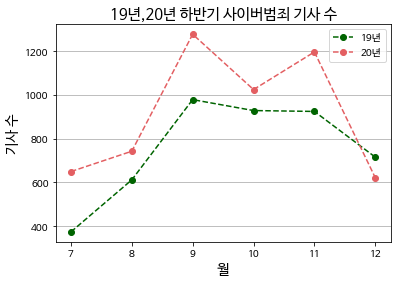

In [ ]:
#시각화 1번: 선 그래프 이용!
plt.plot(df_19_month['월'],df_19_month['일자'], marker='o', color='darkgreen',linestyle='--', label='19년')
plt.plot(df_20_month['월'],df_20_month['일자'], marker='o', color='#e35f62',linestyle='--', label='20년')
plt.title('19년,20년 하반기 사이버범죄 기사 수', fontsize=15) 

plt.xlabel('월', fontsize=14)
plt.ylabel('기사 수', fontsize=14)
plt.grid(True, axis='y')

plt.legend()
plt.show()

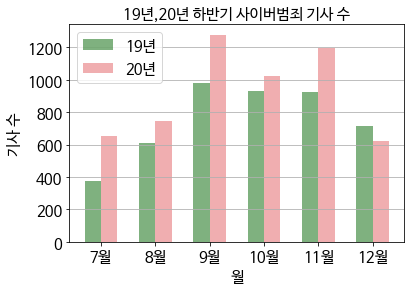

In [ ]:
#시각화 2번: 막대 그래프 이용!

labels = ['7월','8월','9월','10월','11월','12월']
x=np.arange(len(labels))
width = 0.3

fig, axes = plt.subplots()

axes.bar(x-width/2, df_19_month['일자'], width, align='center', color='darkgreen',alpha=0.5 )
axes.bar(x+width/2, df_20_month['일자'], width, align='center', color='#e35f62',alpha=0.5 )

plt.xticks(x)
axes.set_xticklabels(labels, fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('월', fontsize=15)
plt.ylabel('기사 수', fontsize=15)
plt.title('19년,20년 하반기 사이버범죄 기사 수', fontsize=15)
plt.grid(True, axis='y')

plt.legend(['19년','20년'], fontsize=15)
plt.show()

2. 일별 코로나 확진자 수와 월별 코로나 확진자 수 그래프로 나타내보고 기사수와 비교해보기

In [ ]:
#20년 하반기 코로나 확진자 수 데이터 불러오기
df_corona = pd.read_csv('/content/20년하반기코로나발생확진자현황.csv', encoding='utf-8',thousands = ',' )
df_corona.head()

,일자,계(명),국내발생(명),해외유입(명),사망(명)
0,2020-07-01,51,36,15,0
1,2020-07-02,54,44,10,0
2,2020-07-03,61,49,12,0
3,2020-07-04,63,36,27,1
4,2020-07-05,61,43,18,0


In [ ]:
#계(명) 칼럼의 이름을 확진자수로 변경
df_corona.rename(columns = {'계(명)' : '확진자수'}, inplace = True)

In [ ]:
#일자 칼럼의 타입을 datetime으로 변경
df_corona['일자'] = pd.to_datetime(df_corona['일자'])

In [ ]:
#일자 칼럼에서 월만 뺀 칼럼 생성, 칼럼순서 바꿔주기
df_corona['월'] = df_corona['일자'].dt.strftime('%m')
df_corona = df_corona[['일자','월','확진자수','국내발생(명)','해외유입(명)','사망(명)']]
df_corona.head()

,일자,월,확진자수,국내발생(명),해외유입(명),사망(명)
0,2020-07-01,07,51,36,15,0
1,2020-07-02,07,54,44,10,0
2,2020-07-03,07,61,49,12,0
3,2020-07-04,07,63,36,27,1
4,2020-07-05,07,61,43,18,0


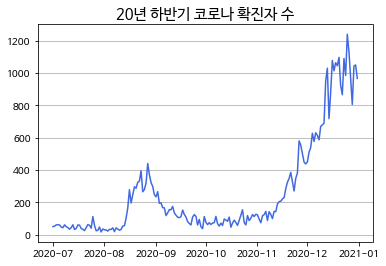

In [ ]:
#일별 코로나 확진자 시각화
plt.plot(df_corona['일자'], df_corona['확진자수'], color='royalblue')
plt.title('20년 하반기 코로나 확진자 수', fontsize=15) 
plt.grid(True, axis='y')


plt.show()

In [ ]:
#월별 코로나 확진자 시각화
df_corona_month = df_corona.groupby('월').sum()
df_corona_month['월']=['7','8','9','10','11','12']
df_corona_month#월별 코로나 확진자 시각화
df_corona_month = df_corona.groupby('월').sum()
df_corona_month['월']=['7','8','9','10','11','12']
df_corona_month

,확진자수,국내발생(명),해외유입(명),사망(명),월
월,,,,,
07,1506,693,813,19,7
08,5641,5214,427,23,8
09,3865,3461,404,89,9
10,2700,2172,528,51,10
11,7688,6895,793,62,11
12,26528,25697,831,374,12


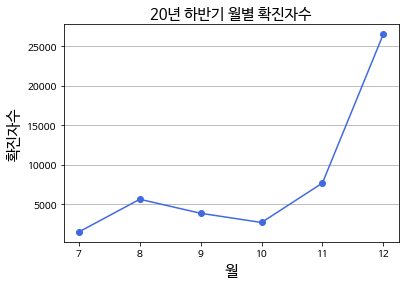

In [ ]:
plt.plot(df_corona_month['월'],df_corona_month['확진자수'], marker='o', color='royalblue')
plt.title('20년 하반기 월별 확진자수', fontsize=15) 

plt.xlabel('월', fontsize=15)
plt.ylabel('확진자수', fontsize=15)
plt.grid(True, axis='y')

plt.show()

20년 하반기 코로나 확진자 수에 따른 기사 수의 양을 파악해보기

*어려운 점*
  - 확진자 수는 몇백명 단위이고, 기사 수는 100개를 넘지 않기 때문에 조정할 방법을 찾아야 한다.
  - 기사 수도 별로 없는 편이라 키워드를 더 늘려야 할 것 같다.

In [ ]:
df_20_month.head()

,일자,기사제목,기사주소,월
월,,,,
7,650,650,650,7
8,743,743,743,8
9,1278,1278,1278,9
10,1025,1025,1025,10
11,1197,1197,1197,11


In [ ]:
df_corona_month.head()

,확진자수,국내발생(명),해외유입(명),사망(명),월
월,,,,,
07,1506,693,813,19,7
08,5641,5214,427,23,8
09,3865,3461,404,89,9
10,2700,2172,528,51,10
11,7688,6895,793,62,11


In [ ]:
df_20_month.rename(columns = {'월' : '월별'}, inplace = True)
df_corona_month.rename(columns = {'월' : '월별'}, inplace = True)

In [ ]:
a = df_20_month.drop(['일자','기사주소'],1)
b = df_corona_month.drop(['국내발생(명)','해외유입(명)','사망(명)'],1)

In [ ]:
a

,기사제목,월별
월,,
7,650,7
8,743,8
9,1278,9
10,1025,10
11,1197,11
12,622,12


In [ ]:
b

,확진자수,월별
월,,
07,1506,7
08,5641,8
09,3865,9
10,2700,10
11,7688,11
12,26528,12


In [ ]:
a = a[['월별','기사제목']]
b = b[['월별','확진자수']]

In [ ]:
a_b = pd.merge(a,b, how='outer', on='월별')
a_b

,월별,기사제목,확진자수
0,7,650,1506
1,8,743,5641
2,9,1278,3865
3,10,1025,2700
4,11,1197,7688
5,12,622,26528


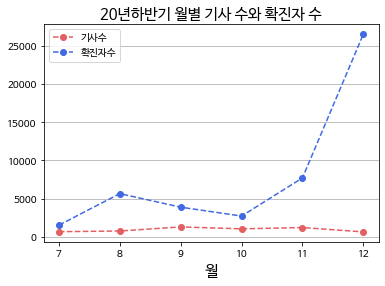

In [ ]:
plt.plot(a_b['월별'],a_b['기사제목'], marker='o', color='#e35f62',linestyle='--',label='기사수')
plt.plot(a_b['월별'],a_b['확진자수'], marker='o', color='royalblue',linestyle='--',label='확진자수')


plt.title('20년하반기 월별 기사 수와 확진자 수', fontsize=15) 

plt.xlabel('월', fontsize=15)
plt.grid(True, axis='y')

plt.legend()
plt.show()
#예상대로 기사 수가 확진자 수에 비해 매우 작기 때문에 파악이 불가
#->확진자수를 100으로 나눠서 해보기

In [ ]:
a

,월별,기사제목
월,,
7,7,650
8,8,743
9,9,1278
10,10,1025
11,11,1197
12,12,622


In [ ]:
b

,월별,확진자수
월,,
07,7,1506
08,8,5641
09,9,3865
10,10,2700
11,11,7688
12,12,26528


In [ ]:
df_a_b =  pd.merge(a,b, how='outer', on='월별')
df_a_b

,월별,기사제목,확진자수
0,7,650,1506
1,8,743,5641
2,9,1278,3865
3,10,1025,2700
4,11,1197,7688
5,12,622,26528


In [ ]:
df_a_b['확진자수/100'] = df_a_b['확진자수'] / 100
df_a_b

,월별,기사제목,확진자수,확진자수/100
0,7,650,1506,15.06
1,8,743,5641,56.41
2,9,1278,3865,38.65
3,10,1025,2700,27.00
4,11,1197,7688,76.88
5,12,622,26528,265.28


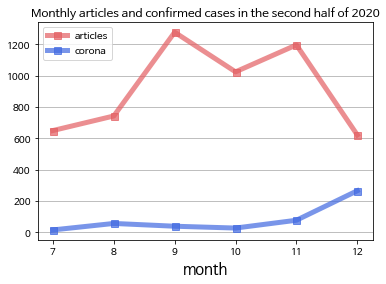

In [ ]:
plt.plot(df_a_b['월별'],df_a_b['기사제목'], '-s', color='#e35f62',markersize=7, linewidth=5, alpha=0.7, label='articles')
plt.plot(df_a_b['월별'],df_a_b['확진자수/100'],'-s', color='royalblue',markersize=7, linewidth=5, alpha=0.7, label='corona')

plt.title('Monthly articles and confirmed cases in the second half of 2020', fontsize=12) 

plt.xlabel('month', fontsize=15)
plt.grid(True, axis='y')

plt.legend()
plt.show()
#다른 방법을 찾아야 할듯

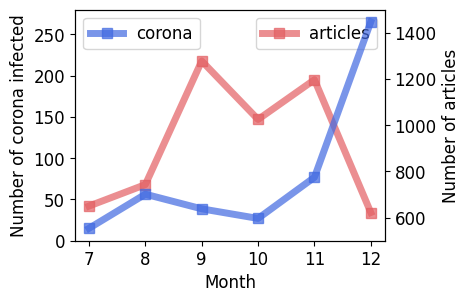

In [ ]:
#이중 y축을 이용하여 시각화 해보기!
#1. 둘다 선그래프일때
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

x = np.arange(7,13)

fig, ax1 = plt.subplots()

ax1.plot(x, df_a_b['확진자수/100'], '-s', color='royalblue', markersize=7, linewidth=5, alpha=0.7, label='corona')
ax1.set_ylim(0, 280)
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of corona infected')

ax2 = ax1.twinx()
ax2.plot(x, df_a_b['기사제목'],'-s', color='#e35f62', markersize=7, linewidth=5, alpha=0.7, label='articles')
ax2.set_ylim(500, 1500)
ax2.set_ylabel('Number of articles')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


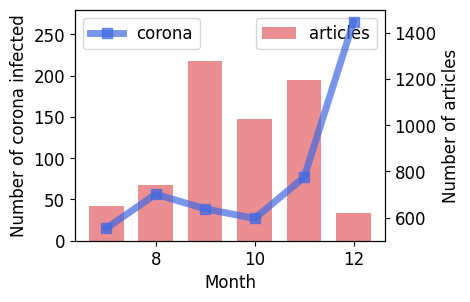

In [ ]:
#이중 y축을 이용하여 시각화 해보기!
#2. 하나는 선그래프, 다른 하나는 막대그래프일때

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

x = np.arange(7,13)

fig, ax1 = plt.subplots()

ax1.plot(x, df_a_b['확진자수/100'], '-s', color='royalblue', markersize=7, linewidth=5, alpha=0.7, label='corona')
ax1.set_ylim(0, 280)
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of corona infected')

ax2 = ax1.twinx()
ax2.bar(x, df_a_b['기사제목'], color='#e35f62', label='articles', alpha=0.7, width=0.7)
ax2.set_ylim(500, 1500)
ax2.set_ylabel('Number of articles')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#이 시각화가 더 좋을듯

#시각화(워드클라우드)

In [ ]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-13.0.2"

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [543 kB]
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 P

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import nltk 
from PIL import Image
from konlpy.tag import Okt
okt = Okt()

In [ ]:
title_19 = ''

for each_line in df_19['기사제목']: 
  title_19 = title_19 + each_line + '\n'

tokens_19 = okt.morphs(title_19)
tokens_19

['한국',
 '사이버',
 '보안',
 '협회',
 '소속',
 "'",
 '디',
 '포렌식',
 '코리아',
 "',",
 '피',
 '씽',
 '구제',
 '위해',
 '디지털',
 '성범죄',
 '및',
 '피싱',
 '대처',
 '\n',
 '[',
 '이웃집',
 '경찰관',
 ']"',
 '스미싱',
 '·',
 '메신저',
 '피싱',
 '·',
 '로맨스',
 '스캠',
 '...',
 '사이버',
 '사',
 '기수법',
 '알려져야',
 '피해',
 '줄여',
 '"',
 '\n',
 '[',
 '사이버',
 '공격',
 '동향',
 '①',
 ']',
 '옛',
 '것',
 '은',
 '가고',
 '새',
 '것',
 '이',
 '온다',
 '\n',
 '[',
 '기고',
 ']',
 '3',
 '不',
 '(',
 '불안',
 ',',
 '불신',
 ',',
 '불행',
 ')',
 '사이버',
 '사기',
 'OUT',
 '\n',
 '증가',
 '하는',
 '인터넷',
 '사기',
 ',',
 '개인',
 '직거래',
 '와',
 '최저',
 '가',
 '유혹',
 '조심해야',
 '\n',
 '컴퓨터',
 '사기',
 '범죄자',
 '들',
 ',',
 '자동화',
 '봇',
 '이',
 '아니라',
 '값싼',
 '노동',
 '력',
 '선호',
 '\n',
 '사설',
 '-',
 '사이버',
 '범죄',
 '근절',
 '대책',
 '마련',
 '을',
 '\n',
 '[',
 '독자',
 '투고',
 ']',
 '사이버',
 '범죄',
 '예',
 '방법',
 '숙지',
 '로',
 '풍',
 '성한',
 '한가위',
 '보내세요',
 '\n',
 '추석',
 '연휴',
 ',',
 '사이버',
 '범죄',
 '예방',
 '은',
 '?',
 '\n',
 '사이버',
 '범죄',
 '예',
 '방법',
 '숙지',
 '로',
 '풍',
 '성한',
 '한가위',
 '보내세요',
 '\n',
 '비자',
 ',',
 '보안'

In [ ]:
ko = nltk.Text(tokens_19, name='19년도 기사제목')
print(len(ko.tokens))
print(len(set(ko.tokens)))

73707
4825


In [ ]:
ko = nltk.Text(tokens_19, name='19년도 기사제목')
ko.vocab().most_common(100)

[('\n', 4535),
 ("'", 2338),
 (',', 2319),
 ('피싱', 1925),
 ('씽', 1645),
 ('보이스피싱', 1443),
 ('몸캠피', 1363),
 ('피해', 1278),
 ('"', 900),
 ('몸캠', 818),
 ('앱', 771),
 ('시', 757),
 ('피해자', 708),
 ('큐어', 705),
 ('24시간', 650),
 ('에', 629),
 ('예방', 603),
 ('보안', 589),
 ('차단', 572),
 ('구제', 547),
 ("',", 529),
 ('‘', 528),
 ('대응', 509),
 ('및', 489),
 ('…', 448),
 ('범죄', 425),
 ('·', 420),
 ('전문', 414),
 ('사기', 413),
 ('유포', 405),
 ('[', 399),
 ('디', 392),
 ('해결', 377),
 (']', 376),
 ('센터', 362),
 ('협박', 356),
 ('업체', 338),
 ('코리아', 333),
 ('동영상', 326),
 ('포렌식', 312),
 ('피', 285),
 ('솔루션', 280),
 ('제공', 280),
 ('상담', 276),
 ('(', 273),
 ('한', 273),
 ('’', 272),
 ('로', 252),
 ('직원', 236),
 ('등', 234),
 ('으로', 216),
 ('의', 212),
 ('무료', 212),
 ('”', 212),
 ('팀', 209),
 ('“', 208),
 ('기술', 204),
 ('운영', 203),
 ('신고', 200),
 ('개인정보', 199),
 ('은행', 198),
 ('’,', 196),
 ('이', 195),
 ('을', 195),
 ('와', 187),
 ('도', 179),
 ('농협', 178),
 ('서비스', 177),
 ('장', 176),
 ('들', 174),
 ('영상통화', 174),
 ('하는', 167)

In [ ]:
stop_words = ['\n',',',"'",'…','[',']','"','에','“','·','”','‘','’','의','명','도','은','이','...','로','한',
              '으로','2','내년','나','건','-','그','등','657','중','더','가','만','개','제','3','사','하는','/','들',
              '10','까지','할','만에','다','는','수','새','몸캠피','씽','시',"',",'디','및','피','(','무료','팀','’,',
              '을','와','장','해','적','해야','?','과','아','피카','막아','하며',')','㈜','서','),','에서',")'",'액',
              '통해','를','위','인','무','휴','퍼블','휴','화','한다','간','큐어','24시간',]

tokens_19 = [each_word for each_word in tokens_19 if each_word not in stop_words]

ko_19 = nltk.Text(tokens_19, name='19년도 기사제목')
ko_19.vocab().most_common(100)

[('피싱', 1925),
 ('보이스피싱', 1443),
 ('피해', 1278),
 ('몸캠', 818),
 ('앱', 771),
 ('피해자', 708),
 ('예방', 603),
 ('보안', 589),
 ('차단', 572),
 ('구제', 547),
 ('대응', 509),
 ('범죄', 425),
 ('전문', 414),
 ('사기', 413),
 ('유포', 405),
 ('해결', 377),
 ('센터', 362),
 ('협박', 356),
 ('업체', 338),
 ('코리아', 333),
 ('동영상', 326),
 ('포렌식', 312),
 ('솔루션', 280),
 ('제공', 280),
 ('상담', 276),
 ('직원', 236),
 ('기술', 204),
 ('운영', 203),
 ('신고', 200),
 ('개인정보', 199),
 ('은행', 198),
 ('농협', 178),
 ('서비스', 177),
 ('영상통화', 174),
 ('기업', 167),
 ('지원', 166),
 ('사이버', 162),
 ('소프트', 156),
 ('감사', 153),
 ('실시', 150),
 ('경찰서', 150),
 ('각종', 144),
 ('위해', 143),
 ('경찰', 143),
 ('카페', 137),
 ('몸', 133),
 ('채팅', 122),
 ('긴급', 121),
 ('한국', 120),
 ('대처', 119),
 ('카시', 119),
 ('법', 118),
 ('주의', 111),
 ('IT', 111),
 ('금감원', 110),
 ('라바', 109),
 ('웨이브', 109),
 ('정보', 108),
 ('화상', 106),
 ('제로', 105),
 ('나서', 101),
 ('유출', 100),
 ('방안', 100),
 ('데이', 100),
 ('금융', 95),
 ('진행', 87),
 ('불법', 87),
 ('급증', 85),
 ('사칭', 82),
 ('모임', 82),
 ('막은', 

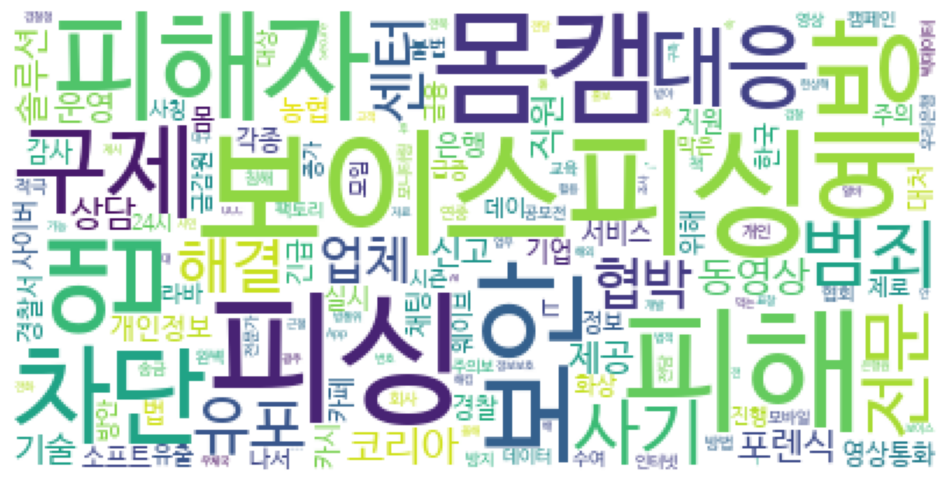

In [ ]:
data = dict(ko_19.vocab().most_common(150))
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                      relative_scaling = 0.2,
                      background_color='white',).generate_from_frequencies(data)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
title_20 = ''

for each_line in df_20['기사제목']: 
  title_20 = title_20 + each_line + '\n'

tokens_20 = okt.morphs(title_20)
tokens_20

["'",
 '사이버범죄',
 '증거',
 ',',
 '온라인',
 '으로',
 '제출',
 "'…",
 '경찰',
 ',',
 '시스템',
 '개편',
 '\n',
 '경찰청',
 ',',
 '사이버범죄',
 '신고',
 '시스템',
 '개편',
 '…',
 '기계',
 '적',
 '출석',
 '요구',
 '대폭',
 '줄여',
 '\n',
 '비',
 '대면',
 '을',
 '재료',
 '로',
 '…',
 '진화',
 '하는',
 '중고',
 '사기',
 '\n',
 '토스',
 ',',
 '경찰청',
 '과',
 '손잡고',
 '`',
 '사기',
 '의심',
 '사이렌',
 '`',
 '강화',
 '\n',
 '사이버범죄',
 '신고',
 '시스템',
 '전면',
 '개편',
 ',',
 '“',
 '온라인',
 '으로',
 '증거',
 '제출',
 '”',
 '\n',
 '몸캠',
 '피싱',
 '보안',
 '전문',
 '‘',
 '올',
 '세이프',
 '’,',
 '피',
 '씽',
 '사기',
 '조직',
 '패턴',
 '파악',
 '하여',
 '사후',
 '관리',
 '진행',
 '한다',
 '\n',
 '[',
 '온라인',
 '사기',
 '기승',
 ']',
 '아이템',
 '·',
 '계정',
 '·',
 '캐릭터',
 '로',
 '유혹',
 '하고',
 '…',
 '돈',
 '만',
 '챙겨',
 '잠적',
 '\n',
 '미국',
 '재무부',
 '의',
 '코로나',
 '관련',
 '랜섬',
 '웨어',
 '경고',
 ',',
 '어떤',
 '의미',
 '인가',
 '?',
 '\n',
 '사이버',
 '사기',
 '병합',
 '수사',
 ',',
 '메신저',
 '·',
 '몸캠',
 '피싱',
 '등',
 '으로',
 '확대',
 '\n',
 '경기',
 '수원',
 '중부',
 '경찰서',
 ',',
 '사이버',
 '사기',
 '조직',
 '13',
 '명',
 '검거',
 '…',
 '4',
 '명',
 '구속',
 '\n

In [ ]:
ko = nltk.Text(tokens_20, name='20년도 기사제목')
print(len(ko.tokens))
print(len(set(ko.tokens)))

80295
6038


In [ ]:
ko = nltk.Text(tokens_19, name='20년도 기사제목')
ko.vocab().most_common(100)

[('피싱', 1925),
 ('보이스피싱', 1443),
 ('피해', 1278),
 ('몸캠', 818),
 ('앱', 771),
 ('피해자', 708),
 ('예방', 603),
 ('보안', 589),
 ('차단', 572),
 ('구제', 547),
 ('대응', 509),
 ('범죄', 425),
 ('전문', 414),
 ('사기', 413),
 ('유포', 405),
 ('해결', 377),
 ('센터', 362),
 ('협박', 356),
 ('업체', 338),
 ('코리아', 333),
 ('동영상', 326),
 ('포렌식', 312),
 ('솔루션', 280),
 ('제공', 280),
 ('상담', 276),
 ('직원', 236),
 ('기술', 204),
 ('운영', 203),
 ('신고', 200),
 ('개인정보', 199),
 ('은행', 198),
 ('농협', 178),
 ('서비스', 177),
 ('영상통화', 174),
 ('기업', 167),
 ('지원', 166),
 ('사이버', 162),
 ('소프트', 156),
 ('감사', 153),
 ('실시', 150),
 ('경찰서', 150),
 ('각종', 144),
 ('위해', 143),
 ('경찰', 143),
 ('카페', 137),
 ('몸', 133),
 ('채팅', 122),
 ('긴급', 121),
 ('한국', 120),
 ('대처', 119),
 ('카시', 119),
 ('법', 118),
 ('주의', 111),
 ('IT', 111),
 ('금감원', 110),
 ('라바', 109),
 ('웨이브', 109),
 ('정보', 108),
 ('화상', 106),
 ('제로', 105),
 ('나서', 101),
 ('유출', 100),
 ('방안', 100),
 ('데이', 100),
 ('금융', 95),
 ('진행', 87),
 ('불법', 87),
 ('급증', 85),
 ('사칭', 82),
 ('모임', 82),
 ('막은', 

In [ ]:
stop_words = ['\n',',',"'",'…','[',']','"','에','“','·','”','‘','’','의','명','도','은','이','...','로','한',
              '으로','2','내년','나','건','-','그','등','657','중','더','가','만','개','제','3','사','하는','/','들',
              '10','까지','할','만에','다','는','수','새','인','형','또','우리','銀','넘어','A','Z','번','해야','당','..','달','"…','4','에서','?…','!','장',
              '첫','대','을','없다','이유','`','내','원','?','때','고','못','1','것','과','된','될','적','서','보위',
              '성','한다','위','빅브','러더','된다','화','땐','’…','놈','하나','…"','선','>','안','연내','권','하면',
             '(', ')','좀',"'…",'를','씽','피','시','라','및','풋','디','막은',"',",'액','확','아','퍼블','해','와','’,',
              '간','’,','···','통해','몸캠피','큐어',]

tokens_20 = [each_word for each_word in tokens_20 if each_word not in stop_words]

ko_20 = nltk.Text(tokens_20, name='20년도 기사제목')
ko_20.vocab().most_common(100)

[('보이스피싱', 1973),
 ('피싱', 1268),
 ('피해', 1066),
 ('몸캠', 829),
 ('예방', 668),
 ('개인정보', 421),
 ('피해자', 379),
 ('대응', 373),
 ('직원', 362),
 ('감사', 320),
 ('사기', 302),
 ('보안', 285),
 ('유포', 284),
 ('경찰', 280),
 ('경찰서', 280),
 ('코로나', 255),
 ('범죄', 252),
 ('앱', 251),
 ('차단', 245),
 ('협박', 245),
 ('동영상', 242),
 ('전문', 240),
 ('기술', 226),
 ('농협', 216),
 ('개인', 208),
 ('정보보호', 206),
 ('금융', 188),
 ('은행', 187),
 ('업체', 185),
 ('케어', 185),
 ('정보', 176),
 ('구제', 171),
 ('침해', 163),
 ('책', 162),
 ('메신저', 155),
 ('전달', 150),
 ('서비스', 148),
 ('영상', 143),
 ('대처', 138),
 ('솔루션', 134),
 ('유출', 132),
 ('검거', 130),
 ('주의', 130),
 ('막아', 129),
 ('19', 128),
 ('보호', 128),
 ('제공', 127),
 ('데이터', 125),
 ('부동산', 123),
 ('대출', 118),
 ('은행원', 118),
 ('대구', 116),
 ('증가', 112),
 ('AI', 112),
 ('공개', 110),
 ('수여', 109),
 ('사칭', 108),
 ('활용', 104),
 ('해결', 103),
 ('시즌', 101),
 ('급증', 99),
 ('거래', 97),
 ('상담', 97),
 ('팩토리', 97),
 ('센터', 94),
 ('추석', 92),
 ('돈', 90),
 ('주의보', 87),
 ('署', 85),
 ('진자', 85),
 ('법', 83),


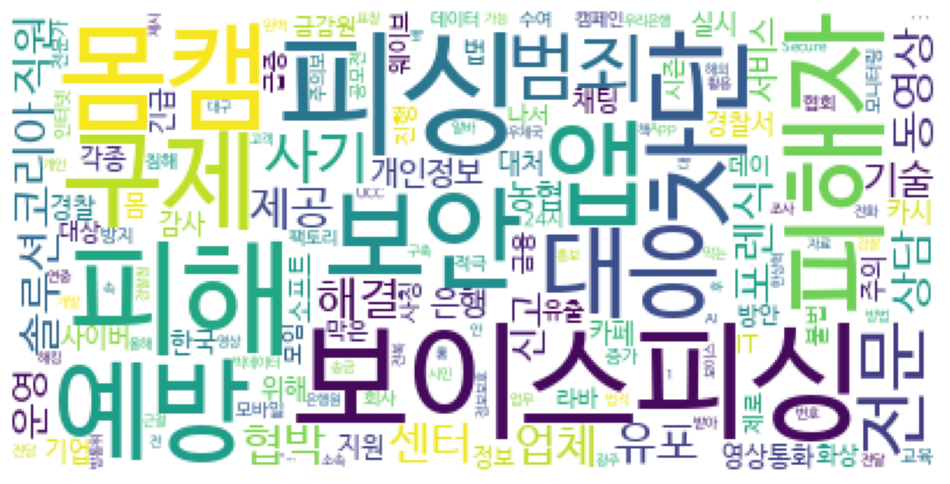

In [ ]:
#비교를 위해 다시 가져온 19년도 워드클라우드
data = dict(ko_19.vocab().most_common(150))
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                      relative_scaling = 0.2,
                      background_color='white',).generate_from_frequencies(data)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

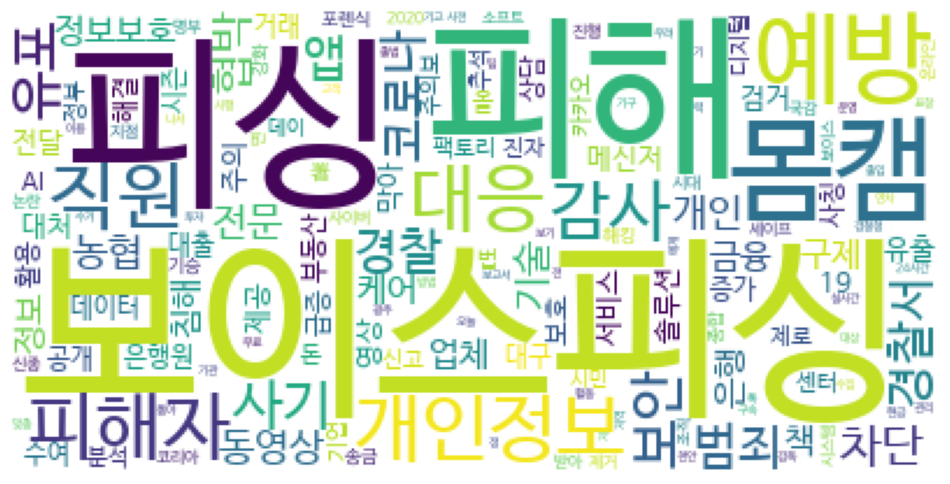

In [ ]:
#20년도 워드클라우드
data = dict(ko_20.vocab().most_common(150))
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                      relative_scaling = 0.2,
                      background_color='white',).generate_from_frequencies(data)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()